# Minería de Datos

# Trabajo Práctico N°1

## Integrantes: Menescaldi Brisa, Vercesi Patricio

### 1. Importación de librerías y datos

In [26]:
!pip install gap_stat -q
!pip install plotly -q
!pip install scikit-learn -q

In [27]:
#Importación de librerias
#from google.colab import files
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score,silhouette_samples
from gap_statistic import OptimalK

In [42]:
#Subirlo seleccionando archivo
files.upload()

Saving Crop_recommendation.csv to Crop_recommendation (1).csv


{'Crop_recommendation (1).csv': b'N,P,K,temperature,humidity,ph,rainfall,label\r\n90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362,rice\r\n85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice\r\n60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice\r\n74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice\r\n78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice\r\n69,37,42,23.05804872,83.37011772,7.073453503,251.0549998,rice\r\n69,55,38,22.70883798,82.63941394,5.70080568,271.3248604,rice\r\n94,53,40,20.27774362,82.89408619,5.718627177999999,241.9741949,rice\r\n89,54,38,24.51588066,83.53521629999999,6.685346424,230.4462359,rice\r\n68,58,38,23.22397386,83.03322691,6.336253525,221.2091958,rice\r\n91,53,40,26.52723513,81.41753846,5.386167788,264.6148697,rice\r\n90,46,42,23.97898217,81.45061596,7.50283396,250.0832336,rice\r\n78,58,44,26.80079604,80.88684822,5.108681786,284.4364567,rice\r\n93,56,36,24.01497622,82.05687182,6.98435366,185.2773389,ri

In [28]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### 2. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y elegir un método de estandarización.

#### Exploración de los datos

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Como podemos observar no hay valores faltantes.

In [30]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


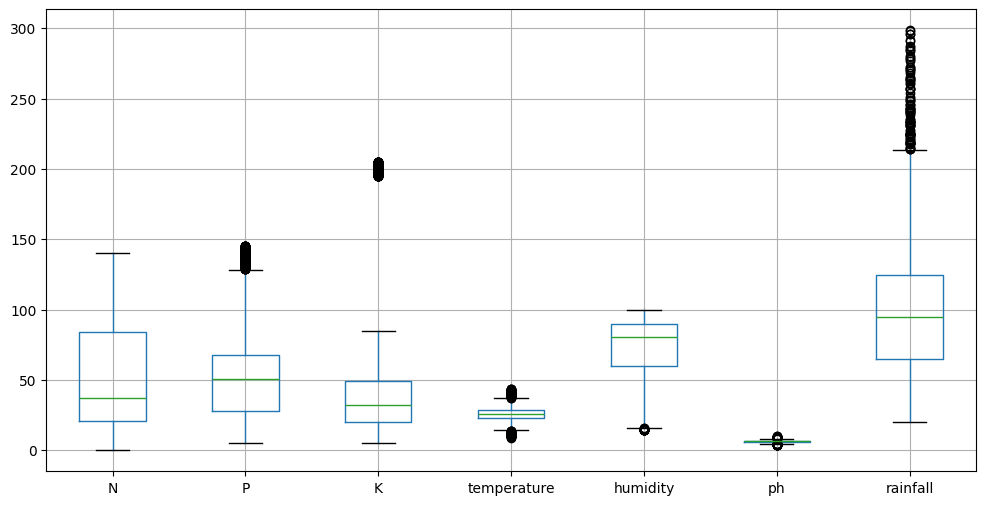

In [31]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.show()

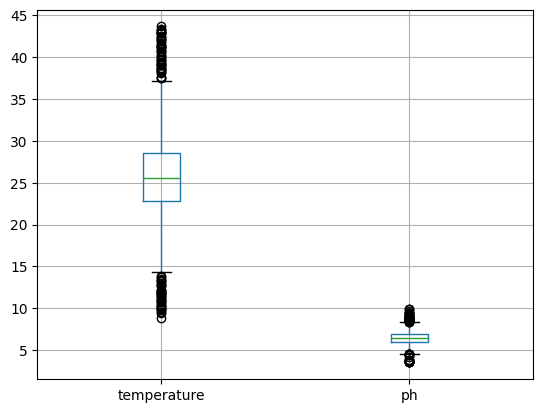

In [32]:
# Para ver de más cerca las columnas con menos rango
df[["temperature", "ph"]].boxplot()
plt.show()

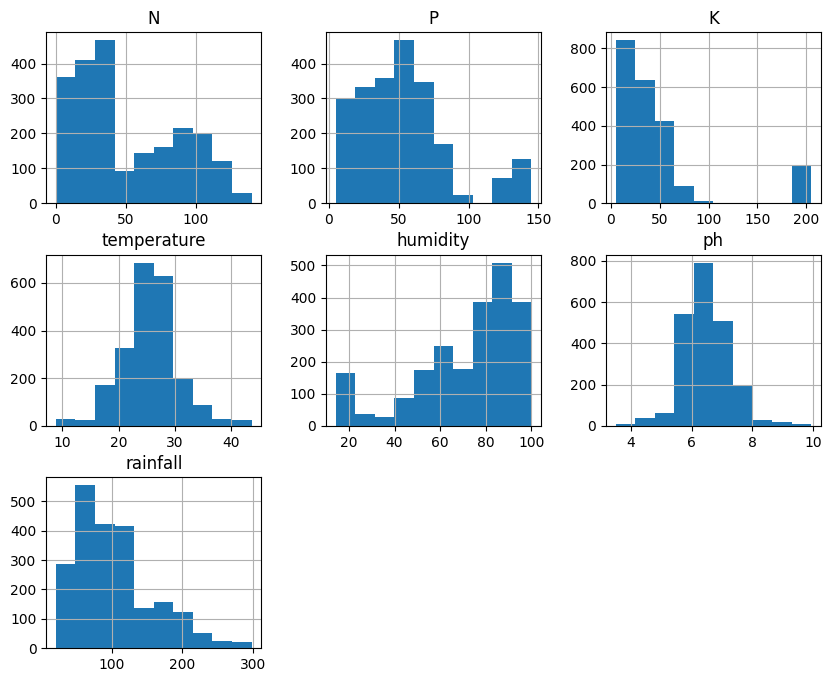

In [33]:
df.hist(figsize=(10, 8))
plt.show()

C:\Users\Patricio\AppData\Local\Temp\ipykernel_24340\1866249332.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



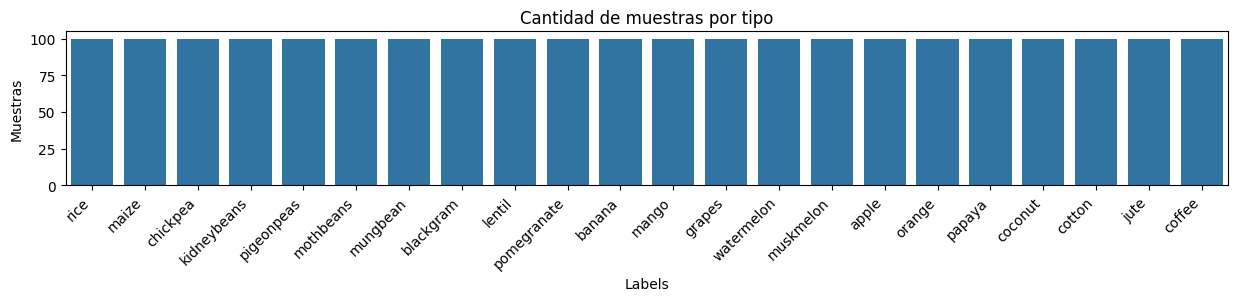

In [35]:
# Chequeamos si hay outliers de la variable categórica:
plt.figure(figsize=(15, 2))
ax = sns.countplot(x='label', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Labels")
plt.ylabel("Muestras")
plt.title('Cantidad de muestras por tipo')
plt.show()

Aunque los boxplots determinen ciertos datos como outliers, en los histogramas podemos ver que hay múltiples datos en todos los valores extremos y en realidad no son atípicos.

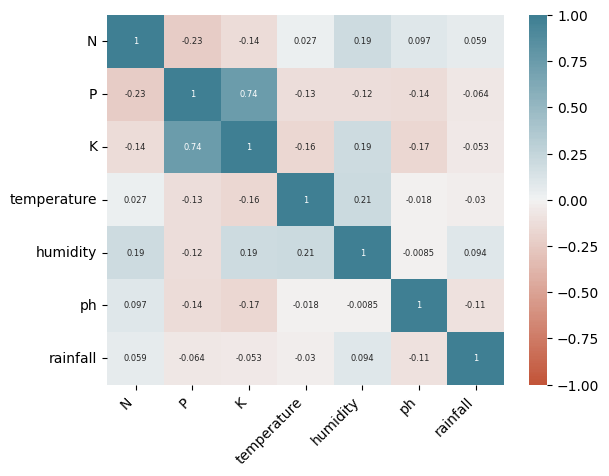

In [36]:
corr = df.drop(columns=["label"]).corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot = True, annot_kws = {'size': 6})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Todas las características están bastante poco correlacionadas, si algunas dimensiones se van a unir serán la P y la K

#### Estandarización de los datos

Separaremos los atributos numéricos del que tiene labels porque no aplicaremos reducción de dimensionalidad sobre este último, sino que lo usaremos para observar cuan separadas quedan las categorías después de cada método.

In [37]:
df_y = df.label
df_x = df.drop('label', axis=1)

Todos los atributos que quedan son numéricos y los escalaremos por Z-score

In [38]:
x_s = StandardScaler().fit_transform(df_x)
x_s

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

### 3. Realizar PCA y determinar el número de componentes principales considerando alguno de los 3 criterios datos en la práctica. Graficar la varianza acumulada y las componentes de PCA en un grafico 2 o 3D con sus respectivas clases.

#### Calculamos todas las componentes principales

In [53]:
pca = PCA(n_components = x_s.shape[1])
pca_features = pca.fit_transform(x_s)

pca_df = pd.DataFrame(data=pca_features, columns=[f'PC{i+1}' for i in range(x_s.shape[1])])
pca_df['label'] = df['label']
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582869,-0.844586,1.373343,-1.614129,0.308224,-0.095997,-0.025239,rice
1,-0.474635,-0.784895,1.252178,-1.792762,1.107745,-0.532255,-0.280543,rice
2,-0.634068,-0.694522,1.179332,-1.818106,2.523263,-0.538551,-0.105967,rice
3,-1.047920,-1.087658,1.393351,-0.982401,1.448781,-0.656929,0.275272,rice
4,-0.873258,-0.658673,1.455685,-2.335012,1.959633,-0.318025,0.052740,rice


#### Averiguamos cuanta varianza explican para ver con cuáles nos quedamos

In [54]:
pca_rtd = pd.DataFrame({'explained_variance_ratio':pca.explained_variance_ratio_}, index=pca_df.columns[:-1])
pca_rtd

,explained_variance_ratio
PC1,0.275888
PC2,0.184844
PC3,0.153787
PC4,0.146127
PC5,0.115133
PC6,0.096652
PC7,0.027569


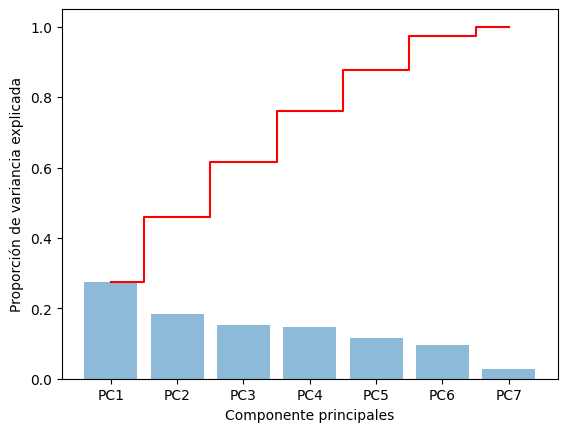

In [55]:
plt.bar(pca_rtd.index, pca_rtd.explained_variance_ratio, alpha=0.5, align='center')
plt.step(pca_rtd.index, np.cumsum(pca_rtd.explained_variance_ratio), where='mid', color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

Usando la regla del ~75%-80% de variancia acumulada explicada decidimos quedarnos con 4 componentes​

In [56]:
pca_df_f = pca_df.drop(columns=["PC5", "PC6", "PC7"])
pca_df_f.head()

,PC1,PC2,PC3,PC4,label
0,-0.582869,-0.844586,1.373343,-1.614129,rice
1,-0.474635,-0.784895,1.252178,-1.792762,rice
2,-0.634068,-0.694522,1.179332,-1.818106,rice
3,-1.047920,-1.087658,1.393351,-0.982401,rice
4,-0.873258,-0.658673,1.455685,-2.335012,rice


#### Graficamos las 2 componentes principales sobre las características de los distintos cultivos

In [57]:
fig = px.scatter(pca_df_f, x='PC1', y='PC2', color = pca_df_f["label"],  labels={'color': 'label'})
fig.update_layout(title = "PCA de dataset sobre cultivos")
fig.show()

Podemos ver que los tipos de cultivo están bastante solapados en el gráfico, por lo tanto se pierde mucha información al reducirlo a dos dimensiones, o el resto de características no dependen tanto de las labels de cultivos que hay.

### 4. Aplicar Isomap y analizar los resultados obtenidos variando el numero de vecinos y componentes. Realizar un grafico en 2D utilizando dos componentes.

2 componentes y 6 vecinos

In [58]:
isomapWheat = Isomap(n_neighbors=6, n_components=2)
isomapWheat.fit(x_s)
manifold_2Da = isomapWheat.transform(x_s)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Componente 1', 'Componente 2'])
manifold_2D['label'] = df['label']
manifold_2D.head()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

,Componente 1,Componente 2,label
0,4.144556,1.327438,rice
1,4.272144,0.754142,rice
2,5.086342,0.383533,rice
3,4.725210,0.412735,rice
4,5.075260,0.370068,rice


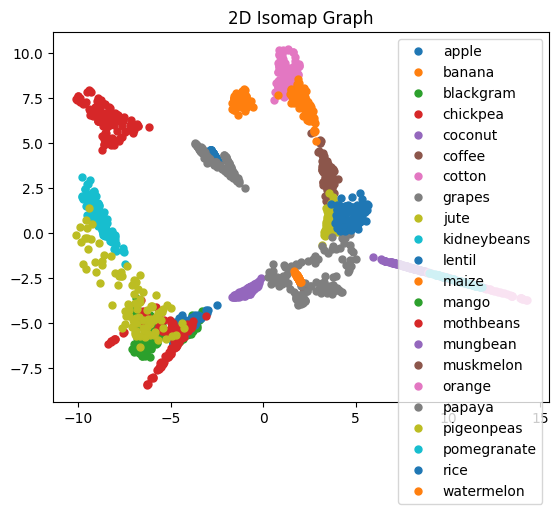

In [59]:
groups = manifold_2D.groupby('label')
plt.title('2D Isomap Graph')
for name, group in groups:
 plt.plot(group['Componente 1'], group['Componente 2'], marker='o', linestyle='', markersize=5, label=name)
plt.legend()

2 componentes y 12 vecinos

In [60]:
isomapWheat = Isomap(n_neighbors=12, n_components=2)
isomapWheat.fit(x_s)
manifold_2Da = isomapWheat.transform(x_s)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Componente 1', 'Componente 2'])
manifold_2D['label'] = df['label']
manifold_2D.head()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



,Componente 1,Componente 2,label
0,-1.746513,0.220313,rice
1,-2.077841,0.347326,rice
2,-2.690816,0.315170,rice
3,-2.103544,0.143623,rice
4,-2.726578,0.293624,rice


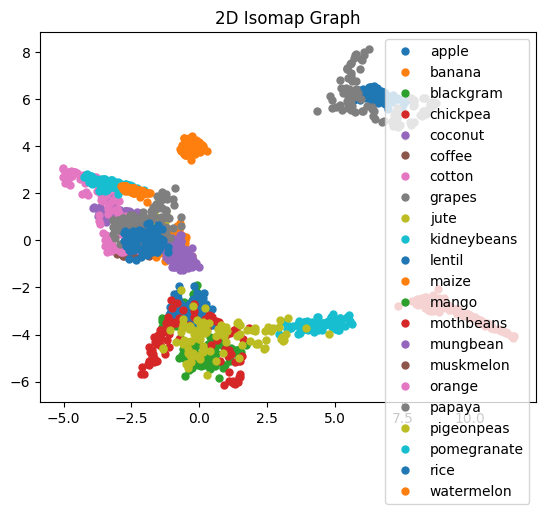

In [61]:
groups = manifold_2D.groupby('label')
plt.title('2D Isomap Graph')
for name, group in groups:
 plt.plot(group['Componente 1'], group['Componente 2'], marker='o', linestyle='', markersize=5, label=name)
plt.legend()

3 componentes y 6 vecinos; es preferible un gráfico 3D porque sino se superpone.

In [62]:
isomapWheat = Isomap(n_neighbors=6, n_components=3)
isomapWheat.fit(x_s)
manifold_2Da = isomapWheat.transform(x_s)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Componente 1', 'Componente 2','Componente 3'])
manifold_2D['label'] = df['label']
manifold_2D.head()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

,Componente 1,Componente 2,Componente 3,label
0,4.144556,1.327438,-1.499504,rice
1,4.272144,0.754142,-0.914943,rice
2,5.086342,0.383533,-0.899580,rice
3,4.725210,0.412735,-0.956091,rice
4,5.075260,0.370068,-0.893164,rice


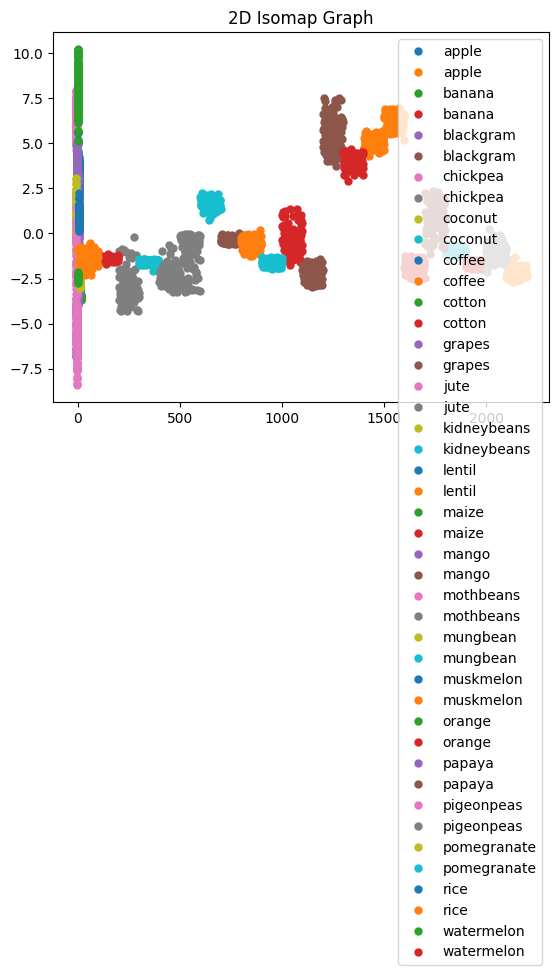

In [63]:
groups = manifold_2D.groupby('label')
plt.title('2D Isomap Graph')
for name, group in groups:
 plt.plot(group['Componente 1'], group['Componente 2'], group ['Componente 3'], marker='o', linestyle='', markersize=5, label=name)
plt.legend()

### 5. Aplicar t-SNE y analizar los resultados obtenidos variando el número de iteraciones, componentes y perplejidad. Realizar un gráfico en 2D de utilizando dos componentes.

In [39]:
import time
time_start = time.time()
tsneWheat = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsneWheatResults = tsneWheat.fit_transform(x_s)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2200 samples in 0.016s...
[t-SNE] Computed neighbors for 2200 samples in 0.176s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2200
[t-SNE] Computed conditional probabilities for sample 2000 / 2200
[t-SNE] Computed conditional probabilities for sample 2200 / 2200
[t-SNE] Mean sigma: 0.517370
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.035522
[t-SNE] KL divergence after 300 iterations: 1.132333
t-SNE done! Time elapsed: 3.9935719966888428 seconds


C:\Users\Patricio\AppData\Local\Temp\ipykernel_24340\3630966644.py:6: UserWarning:


The palette list has fewer values (15) than needed (22) and will cycle, which may produce an uninterpretable plot.



<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

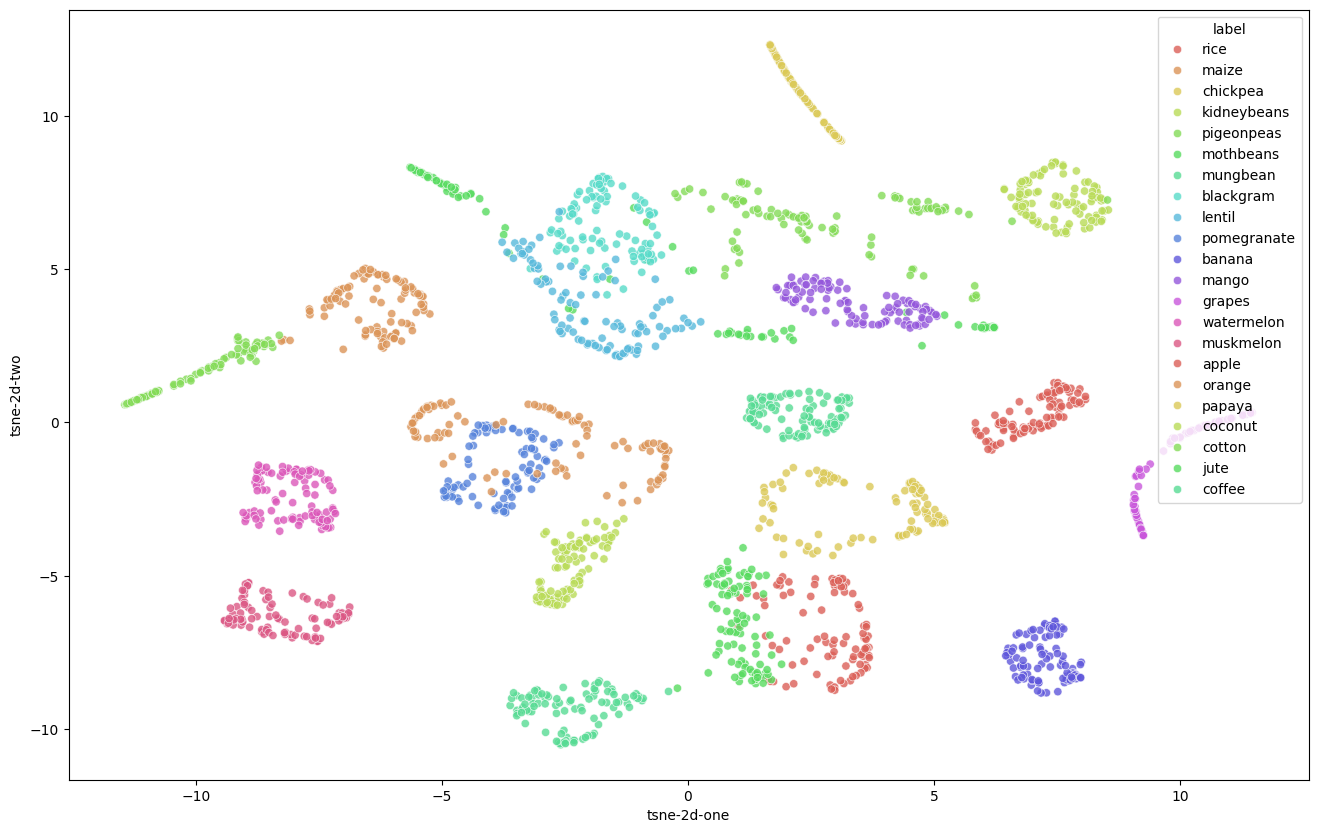

In [40]:
subsetWheatTSNE = pd.DataFrame(df['label'])
subsetWheatTSNE['tsne-2d-one'] = tsneWheatResults[:,0]
subsetWheatTSNE['tsne-2d-two'] = tsneWheatResults[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
 x="tsne-2d-one", y="tsne-2d-two",
 hue="label",
 palette=sns.color_palette("hls", 15),
 data=subsetWheatTSNE,
 legend="full", alpha=0.8)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2200 samples in 0.004s...
[t-SNE] Computed neighbors for 2200 samples in 0.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2200
[t-SNE] Computed conditional probabilities for sample 2000 / 2200
[t-SNE] Computed conditional probabilities for sample 2200 / 2200
[t-SNE] Mean sigma: 0.517370
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.035522
[t-SNE] KL divergence after 600 iterations: 0.520151
t-SNE done! Time elapsed: 9.846946477890015 seconds


C:\Users\Patricio\AppData\Local\Temp\ipykernel_24340\3158437108.py:11: UserWarning:


The palette list has fewer values (15) than needed (22) and will cycle, which may produce an uninterpretable plot.



<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

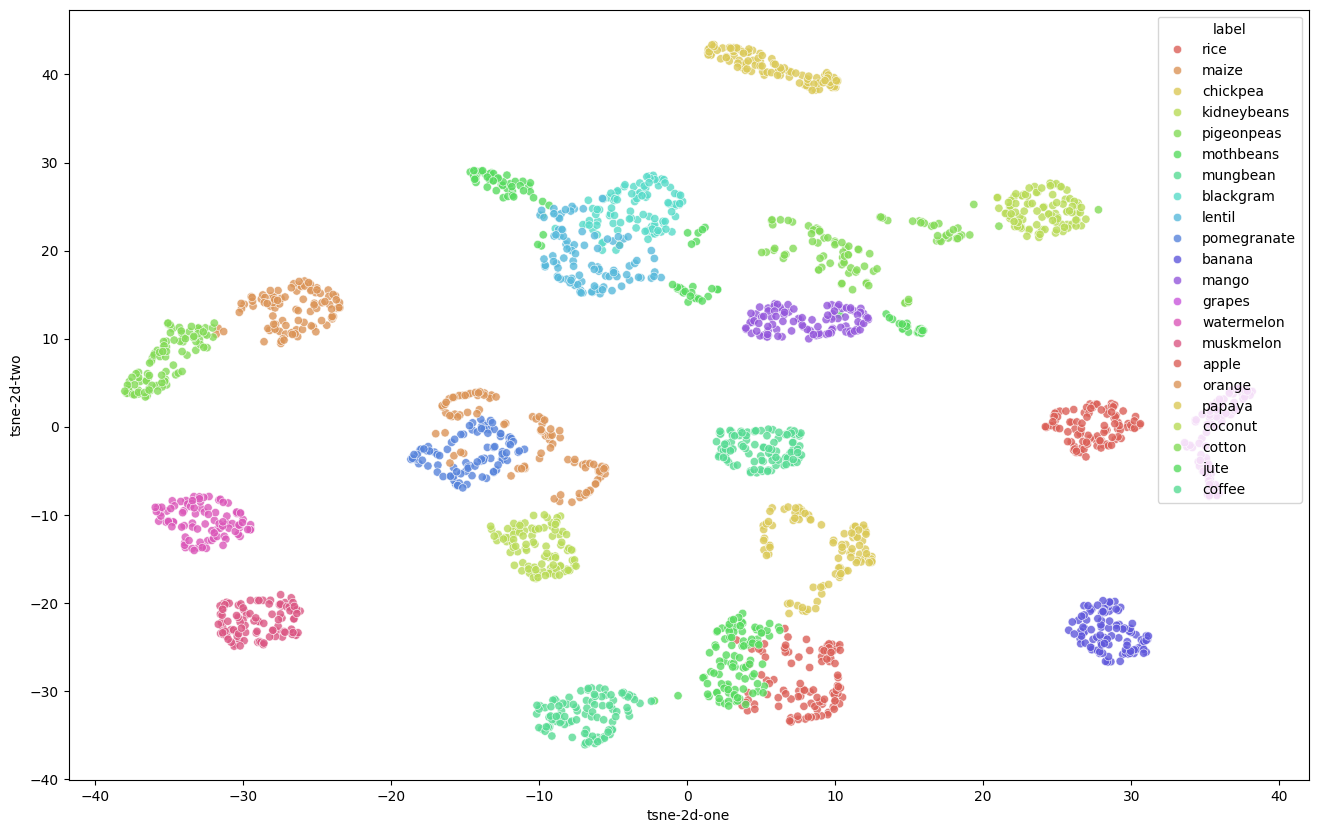

In [41]:
time_start = time.time()
tsneWheat = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
tsneWheatResults = tsneWheat.fit_transform(x_s)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

subsetWheatTSNE = pd.DataFrame(df['label'])
subsetWheatTSNE['tsne-2d-one'] = tsneWheatResults[:,0]
subsetWheatTSNE['tsne-2d-two'] = tsneWheatResults[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
 x="tsne-2d-one", y="tsne-2d-two",
 hue="label",
 palette=sns.color_palette("hls", 15),
 data=subsetWheatTSNE,
 legend="full", alpha=0.8)

### 6. Aplicar K-means y analizar los resultados obtenidos variando el número de clusters y obtener el número óptimo de clusters mediante GAP. Realizar un gráfico en 3D de utilizando tres atributos de los datos y donde los colores estén asociados a los clusters.

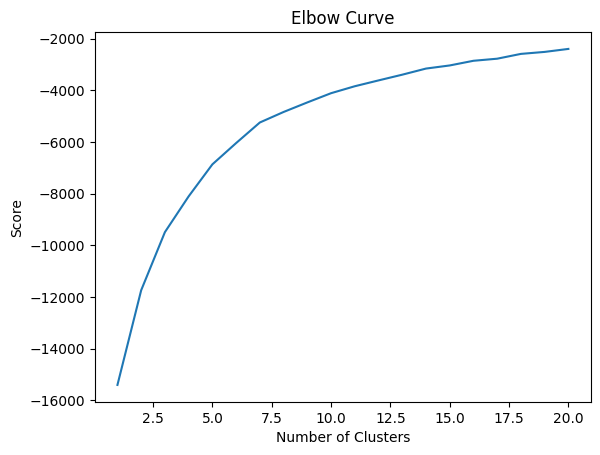

In [42]:
max_c = 20
Nc = range(1, max_c+1)
kmeans = [KMeans(n_clusters=i, n_init = 10) for i in Nc]
score = [kmeans[i].fit(x_s).score(x_s) for i in range(max_c)]

plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [43]:
max_c = len(df_y.unique())
max_c

22

In [44]:
gs_obj = OptimalK(n_jobs=1, n_iter= 10, random_state = 42)
n_clusters = gs_obj(x_s, n_refs=50, cluster_array=np.arange(1, max_c+1))
print('Optimal number of clusters: ', n_clusters)

Optimal number of clusters:  21


In [45]:
kmeans = KMeans(n_clusters = n_clusters, n_init = 10).fit(x_s)
centroids = kmeans.cluster_centers_
print(centroids)

[[-7.98522206e-01 -3.88684066e-01 -4.66548370e-01  8.85541002e-01
  -9.44267948e-01 -1.96599976e+00 -3.61696516e-01]
 [ 1.82265741e+00 -2.19260559e-01 -5.58293239e-01 -3.04563330e-01
   3.67648498e-01  7.17578801e-01 -4.16048216e-01]
 [-8.01298329e-01  2.44539035e+00  2.99624521e+00 -5.38253288e-01
   8.31327288e-01 -6.48181202e-01 -8.13664129e-03]
 [-8.63205285e-01 -1.08030997e+00 -4.17665617e-01 -1.03391030e+00
   8.78572396e-01  3.50520995e-01  9.49267892e-02]
 [-3.44110491e-01  4.36747589e-01  6.39096296e-01 -1.31314004e+00
  -2.46944984e+00  1.91402178e-01 -4.20415009e-01]
 [ 7.78269517e-01 -1.72410025e-01 -1.68225201e-01 -3.84119872e-01
   4.73378311e-01 -7.32083968e-01  2.41525066e+00]
 [-6.52639722e-01 -2.58602420e-01 -4.81358225e-01  7.33699666e-01
   7.25560374e-01  4.08724477e-01 -7.40168292e-01]
 [ 1.33458664e+00 -1.09079711e+00  3.67504091e-02  2.98432846e-01
   7.74789642e-01 -5.90323451e-02 -1.19482926e+00]
 [-7.77018652e-01 -1.10133817e+00 -3.52896798e-01  3.28797649e-0

Text(0.5, 0, 'K')

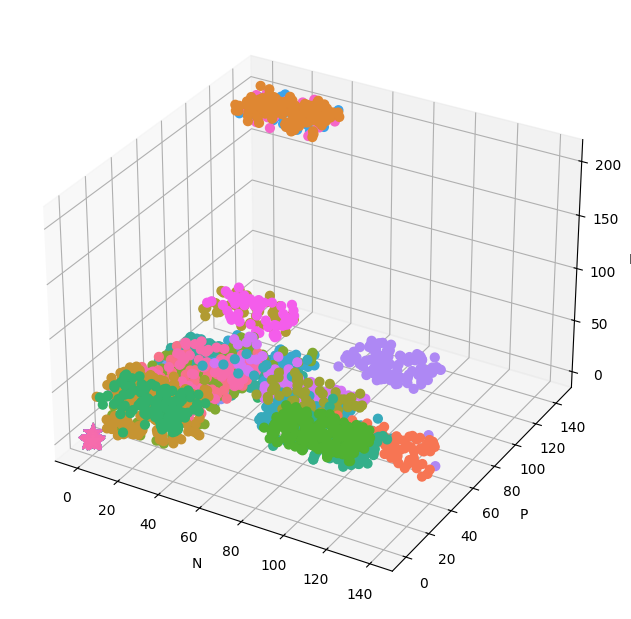

In [46]:
# Getting the cluster centers
centerClusters = kmeans.cluster_centers_

fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

df['newClass'] = kmeans.predict(x_s)
labels = np.unique(df['newClass'])
palette = sns.color_palette("husl", len(labels))

# plot
for label, color in zip(labels, palette):
    df1 = df[df['newClass'] == label]
    ax.scatter(df1['N'], df1['P'], df1['K'],
               s=40, marker='o', color=color, alpha=1, label=label)
    ax.scatter(centerClusters[:, 0], centerClusters[:, 1], centerClusters[:, 2],
               marker='*', color=color, s=200)
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')


### 7. Aplicar clustering jerárquico y determinar cuál número sería el que mejor represente los datos. Utilizar el score de Silhouette y calcular el número óptimo de cluster por medio de GAP.

#### Cálculo de cantidad de clústeres óptimos

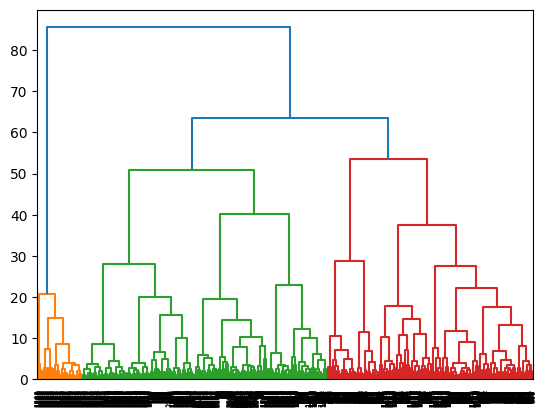

In [47]:
linkage_matrix = linkage(x_s, "ward")
dendrogram(linkage_matrix)
plt.show()

In [48]:
#A ojo puedo ver que agarrando más de 9 clusters no parece haber tanta diferencia de altura entre divisiones, así que voy a chequear hasta 10 clusters por las dudas
n_max = 10

Método GAP

In [49]:
gs_obj = OptimalK(n_jobs=1, n_iter=40, random_state = 42)
n_clusters = gs_obj(x_s, n_refs=60, cluster_array=np.arange(2, n_max+1))
n_clusters

9

#### Modelaje y ajuste de los datos del clustering jerárquico

In [50]:
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_assignments = clustering.fit_predict(x_s)

In [51]:
linkage_matrix = clustering.children_    #en vez de linkage que realiza el fitting de vuelta se debería poder obtener de "clustering" pero no se como
dendrogram(linkage_matrix)
plt.show()

TypeError: Linkage matrix 'Z' must contain doubles.

In [ ]:
linkage_matrix = linkage(x_s, "ward")
dendrogram(linkage_matrix, truncate_mode = 'lastp', p = 10, show_leaf_counts = True)
plt.show()

#### Graficar en 3D con las divisiones de los clusters en colores

In [ ]:
df_c = df.copy()
df_c['cluster'] = cluster_assignments + 1
df_c

In [ ]:
fig = px.scatter_3d(df_c, x='N', y='P', z='K', color=df_c["cluster"],  labels={'color': 'cluster'})
fig.show()

#### Silhouette score

In [ ]:
# Calculo la matriz de distancias entre puntos
pairwise_distances = cdist(x_s, x_s, 'euclidean')

clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_assignments = clustering.fit_predict(x_s)
print(silhouette_score(x_s, cluster_assignments))

Podemos ver que no encontró clusters que diesen un Sihouette Score alto, cosa que puede depender de la naturaleza de los datos o la elección del modelo o los parámetros que le dimos.

# Conclusiones
